In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\sushm\\PGA36\\Projects 2\\Crop Production'

In [2]:
df=pd.read_csv("Crop Production data new.csv")

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Crop_Category,Crop_ID,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,Nut,LDSG001,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,Pulse,NaN,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,Cereal,LDSG762,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,Fruit,NaN,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,Nut,NaN,720.0,165.0


### Basic Understanding of the Data

In [4]:
df.shape

(255304, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255304 entries, 0 to 255303
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     255304 non-null  object 
 1   District_Name  255304 non-null  object 
 2   Crop_Year      255304 non-null  int64  
 3   Season         255304 non-null  object 
 4   Crop           255304 non-null  object 
 5   Crop_Category  249182 non-null  object 
 6   Crop_ID        51350 non-null   object 
 7   Area           255304 non-null  float64
 8   Production     251435 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 17.5+ MB


In [6]:
df.isnull().sum()

State_Name            0
District_Name         0
Crop_Year             0
Season                0
Crop                  0
Crop_Category      6122
Crop_ID          203954
Area                  0
Production         3869
dtype: int64

In [7]:
(df.isnull().sum()/df.shape[0])*100

State_Name        0.000000
District_Name     0.000000
Crop_Year         0.000000
Season            0.000000
Crop              0.000000
Crop_Category     2.397926
Crop_ID          79.886723
Area              0.000000
Production        1.515448
dtype: float64

In [8]:
df.duplicated().sum()

9213

In [9]:
df.describe()

,Crop_Year,Area,Production
count,255304.000000,2.553040e+05,2.514350e+05
mean,2005.645650,1.197929e+04,5.800376e+05
std,4.952922,5.053080e+04,1.712027e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.300000e+02
75%,2010.000000,4.390000e+03,7.022500e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [10]:
df.describe(include="object")

,State_Name,District_Name,Season,Crop,Crop_Category,Crop_ID
count,255304,255304,255304,255304,249182,51350
unique,33,646,6,124,12,114
top,Uttar Pradesh,BIJAPUR,Kharif,Rice,Cereal,LDSG762
freq,34541,976,99573,15669,68849,3307


In [11]:
for i in df.columns:
    print(i, " Value Counts" ,df[i].value_counts())
    print("\n")

State_Name  Value Counts State_Name
Uttar Pradesh                  34541
Madhya Pradesh                 23827
Karnataka                      21942
Bihar                          19628
Assam                          15164
Tamil Nadu                     14078
Odisha                         14065
Maharashtra                    13081
Rajasthan                      12973
Chhattisgarh                   11105
West Bengal                     9992
Andhra Pradesh                  9973
Gujarat                         8717
Haryana                         6089
Telangana                       5849
Uttarakhand                     5076
Kerala                          4419
Nagaland                        4066
Punjab                          3310
Meghalaya                       2963
Arunachal Pradesh               2650
Himachal Pradesh                2584
Jammu and Kashmir               1696
Tripura                         1459
Jharkhand                       1320
Manipur                         1315
Mi

In [12]:
for i in df.columns:
    print(i,":", "Unique" ,df[i].unique())
    print("\n")

State_Name : Unique ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


District_Name : Unique ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHI

In [13]:
df['Season'] = df['Season'].str.strip()

In [14]:
df["Season"].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

### EDA and Preprocessing

In [15]:
(df.isnull().sum()/df.shape[0])*100

State_Name        0.000000
District_Name     0.000000
Crop_Year         0.000000
Season            0.000000
Crop              0.000000
Crop_Category     2.397926
Crop_ID          79.886723
Area              0.000000
Production        1.515448
dtype: float64

In [16]:
df.drop(["Crop_ID"],axis=1,inplace=True)

In [17]:
(df.isnull().sum()/df.shape[0])*100

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Crop_Category    2.397926
Area             0.000000
Production       1.515448
dtype: float64

In [18]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Crop_Category    6122
Area                0
Production       3869
dtype: int64

In [19]:
df.shape

(255304, 8)

In [20]:
df.dropna(inplace=True)

In [21]:
(df.isnull().sum()/df.shape[0])*100

State_Name       0.0
District_Name    0.0
Crop_Year        0.0
Season           0.0
Crop             0.0
Crop_Category    0.0
Area             0.0
Production       0.0
dtype: float64

### Dropping Duplicates

In [22]:
df.duplicated().sum()

8847

In [23]:
df.drop_duplicates(keep="first",inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Crop_Category,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,Nut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,Pulse,2.0,1.0


In [26]:
df1=df.copy()

# Encoding

In [27]:
df.Production

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 236633, dtype: float64

# Train Test Split

In [28]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in df.columns:
    if df[x].dtype == "object":
        df[x]=le.fit_transform(df[x])

In [29]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [30]:
print(X.shape)
print(Y.shape)

(236633, 7)
(236633,)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [32]:
from sklearn.model_selection import train_test_split  

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(189306, 7)
(189306,)
(47327, 7)
(47327,)


# Modelling

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print('RMSE:', np.sqrt(mse))
print('R2 score:', r2_score(Y_test, Y_pred))

RMSE: 416623.39502921037
R2 score: 0.06757830513198693


### DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("RMSE:", np.sqrt(mse))
print('R2 score:', r2_score(Y_test, Y_pred))

RMSE: 176035.90248330188
R2 score: 0.8335332254452332


### Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("RMSE:", np.sqrt(mse))
print('R2 score:', r2_score(Y_test, Y_pred))

print("Result :",model.score(X_train, Y_train))

RMSE: 145296.78509926982
R2 score: 0.8865937284078689
Result : 0.9887232018011777


### AdaBoostRegressor

In [37]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("RMSE:", np.sqrt(mse))
print('R2 score:', r2_score(Y_test, Y_pred))

RMSE: 206023.87302670997
R2 score: 0.7719867121824384


### GradientBoostingRegressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("RMSE:", np.sqrt(mse))
print('R2 score:', r2_score(Y_test, Y_pred))

RMSE: 230465.57211600247
R2 score: 0.7146767394310265


### XGB Regressor

In [39]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("RMSE:", np.sqrt(mse))
print('R2 score:', r2_score(Y_test, Y_pred))

RMSE: 111550.45167938349
R2 score: 0.9331551845189598


# Advanced EDA and Pre Processing

In [40]:
df1

,State_Name,District_Name,Crop_Year,Season,Crop,Crop_Category,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,Nut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,Pulse,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,Cereal,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,Fruit,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,Nut,720.0,165.0
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,Cereal,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,Oilseed,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,Cash Crop,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,Cereal,279151.0,597899.0


In [41]:
continious_columns=["Area","Production"]

### Outliers

Axes(0.125,0.11;0.775x0.77)


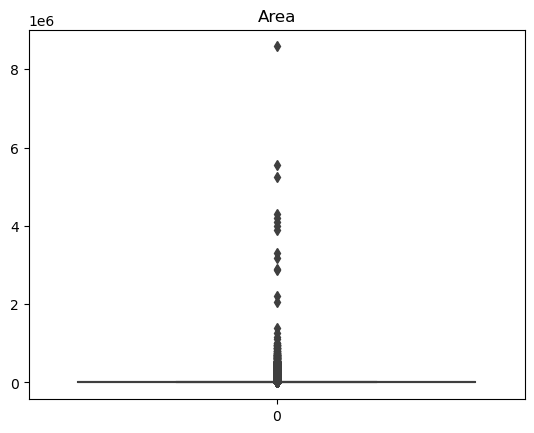

Axes(0.125,0.11;0.775x0.77)


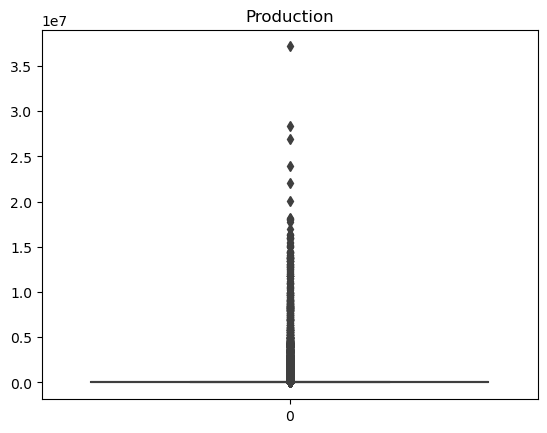

In [42]:
for i in continious_columns:
    print(sns.boxplot(df1[i]))
    plt.title(i)
    plt.show()

In [43]:
for i in continious_columns:
    Q1=df1[i].quantile(0.25)
    Q3=df1[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df1=df1[(df1[i]>=lower) & (df1[i]<=upper)]
df1

,State_Name,District_Name,Crop_Year,Season,Crop,Crop_Category,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,Nut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,Pulse,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,Cereal,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,Fruit,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,Nut,720.0,165.0
...,...,...,...,...,...,...,...,...
246084,West Bengal,PURULIA,2014,Rabi,Wheat,Cereal,1622.0,3663.0
246085,West Bengal,PURULIA,2014,Summer,Maize,Cereal,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,Cereal,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,Oilseed,627.0,463.0


### EDA

####  Highest producing crops

In [45]:
# Drop rows with missing Production data
production_data = df1.dropna(subset=['Production'])

# Group by 'Crop' and calculate the total production for each crop
crop_production = production_data.groupby('Crop')['Production'].sum().reset_index()

# Sort the crops by production in descending order to find the highest producing crops
top_producing_crops = crop_production.sort_values(by='Production', ascending=False).head(10)

# Display the top producing crops
print(top_producing_crops)

                  Crop  Production
58               Maize  9587011.31
66               Onion  7004162.14
3            Arhar/Tur  6300590.90
113               Urad  6149498.46
42           Groundnut  6093587.00
89   Rapeseed &Mustard  6049446.52
92                Rice  5755342.02
84              Potato  4943647.58
47               Jowar  4824712.10
40                Gram  4226923.33


#### Top producing states for highest producing crops

In [46]:
# Group by 'State_Name' and 'Crop', then calculate the total production for each combination
state_crop_production = production_data.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()

# Get the top 5 producing states for each of the top 10 crops
top_crops = top_producing_crops['Crop'].tolist()
top_state_production = state_crop_production[state_crop_production['Crop'].isin(top_crops)].groupby('Crop').apply(lambda x: x.nlargest(5, 'Production')).reset_index(drop=True)

# Display top producing states for each crop
print(top_state_production)

           State_Name               Crop  Production
0       Uttar Pradesh          Arhar/Tur  1400057.00
1      Madhya Pradesh          Arhar/Tur   985203.00
2               Bihar          Arhar/Tur   666782.00
3           Karnataka          Arhar/Tur   562200.00
4             Gujarat          Arhar/Tur   349400.00
5       Uttar Pradesh               Gram  1058596.00
6               Bihar               Gram   642684.00
7             Gujarat               Gram   386600.00
8      Madhya Pradesh               Gram   376275.00
9           Rajasthan               Gram   272322.00
10        Maharashtra          Groundnut   836489.00
11             Odisha          Groundnut   817383.70
12          Karnataka          Groundnut   743425.00
13      Uttar Pradesh          Groundnut   679032.00
14            Gujarat          Groundnut   565400.00
15      Uttar Pradesh              Jowar  1070529.00
16     Madhya Pradesh              Jowar   911642.00
17          Karnataka              Jowar   657

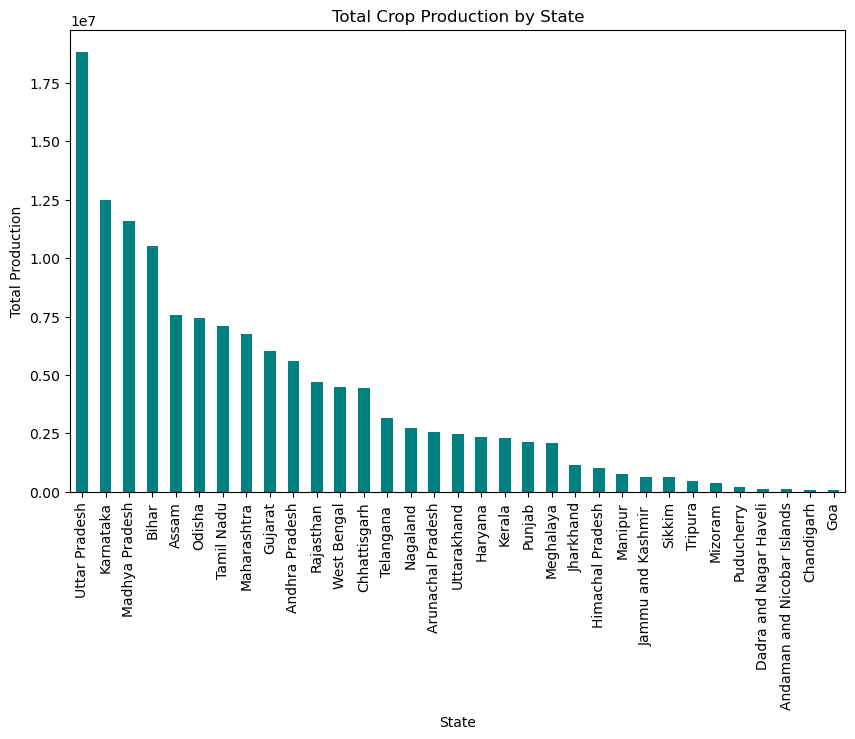

In [47]:
#  Crop Production by State 
plt.figure(figsize=(10, 6))
production_by_state = df1.groupby('State_Name')['Production'].sum().sort_values(ascending=False)
production_by_state.plot(kind='bar', title='Total Crop Production by State', color='teal')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.show()

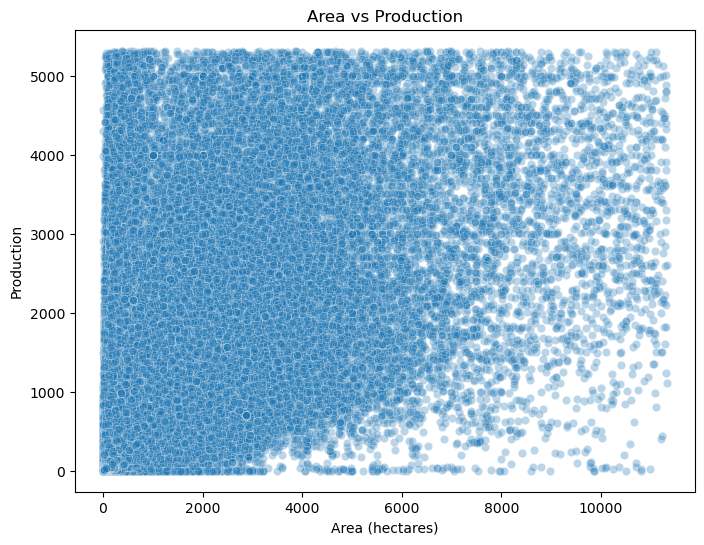

In [48]:
#  Area vs Production
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Production', data=df1, alpha=0.3)
plt.title('Area vs Production')
plt.xlabel('Area (hectares)')
plt.ylabel('Production')
plt.show()

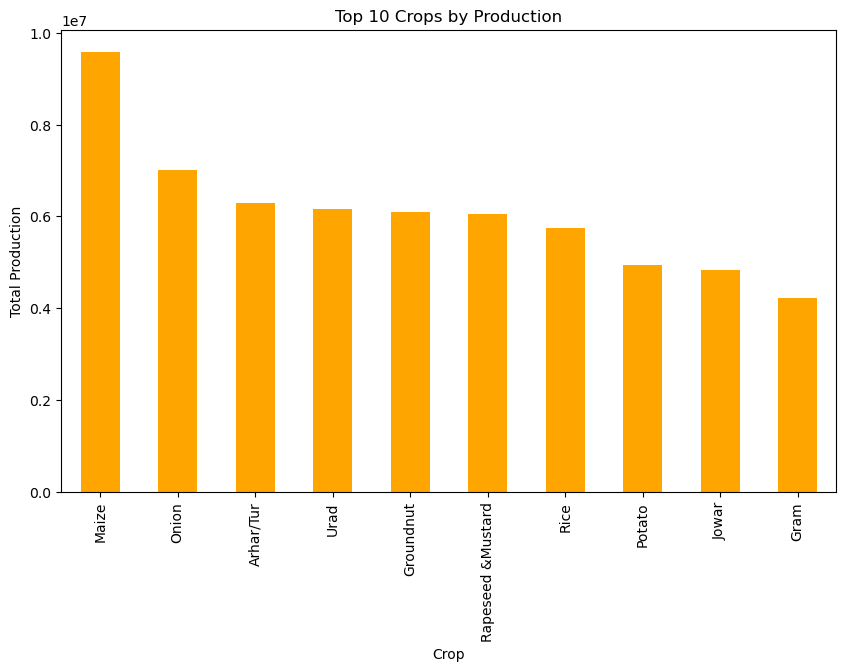

In [49]:
#  Top 10 Crops by Production 
plt.figure(figsize=(10, 6))
top_crops = df1.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
top_crops.plot(kind='bar', color='orange', title='Top 10 Crops by Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.show()

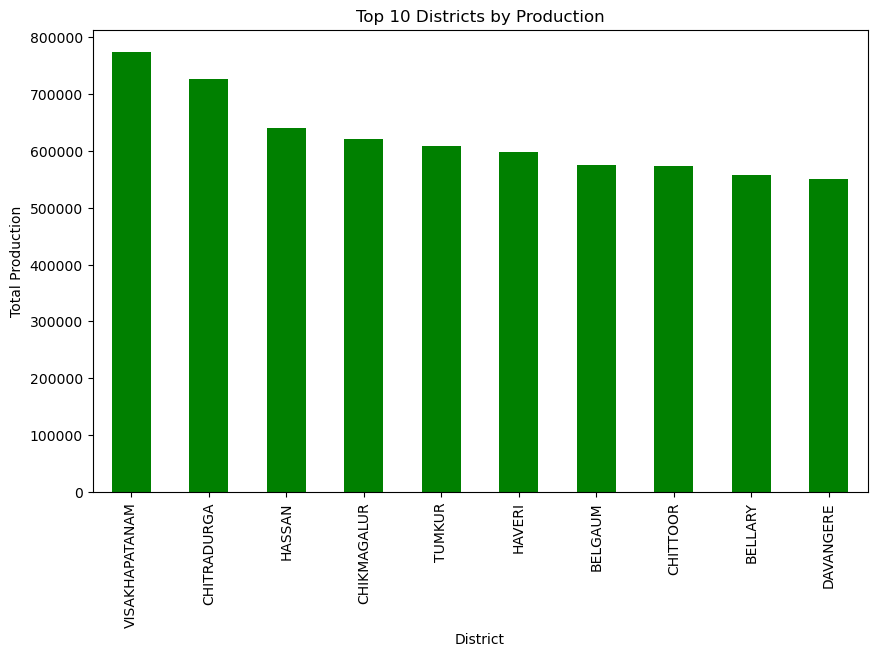

In [50]:
#  Top 10 Districts by Production
plt.figure(figsize=(10, 6))
top_districts = df1.groupby('District_Name')['Production'].sum().sort_values(ascending=False).head(10)
top_districts.plot(kind='bar', color='green', title='Top 10 Districts by Production')
plt.xlabel('District')
plt.ylabel('Total Production')
plt.show()


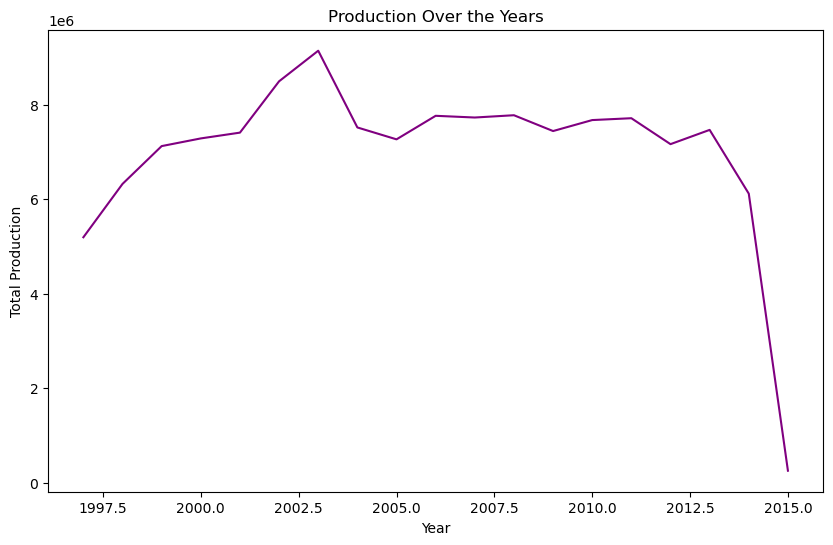

In [51]:
#  Production Over the Years 
plt.figure(figsize=(10, 6))
yearly_production = df1.groupby('Crop_Year')['Production'].sum()
yearly_production.plot(kind='line', title='Production Over the Years', color='purple')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()


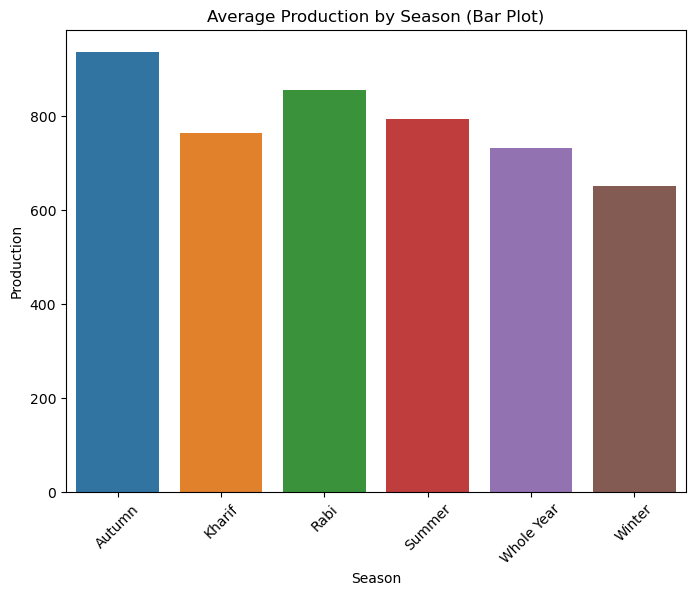

In [52]:
plt.figure(figsize=(8, 6))
season_avg = df1.groupby('Season')['Production'].mean().reset_index()
sns.barplot(x='Season', y='Production', data=season_avg)
plt.title('Average Production by Season (Bar Plot)')
plt.xticks(rotation=45)
plt.show()


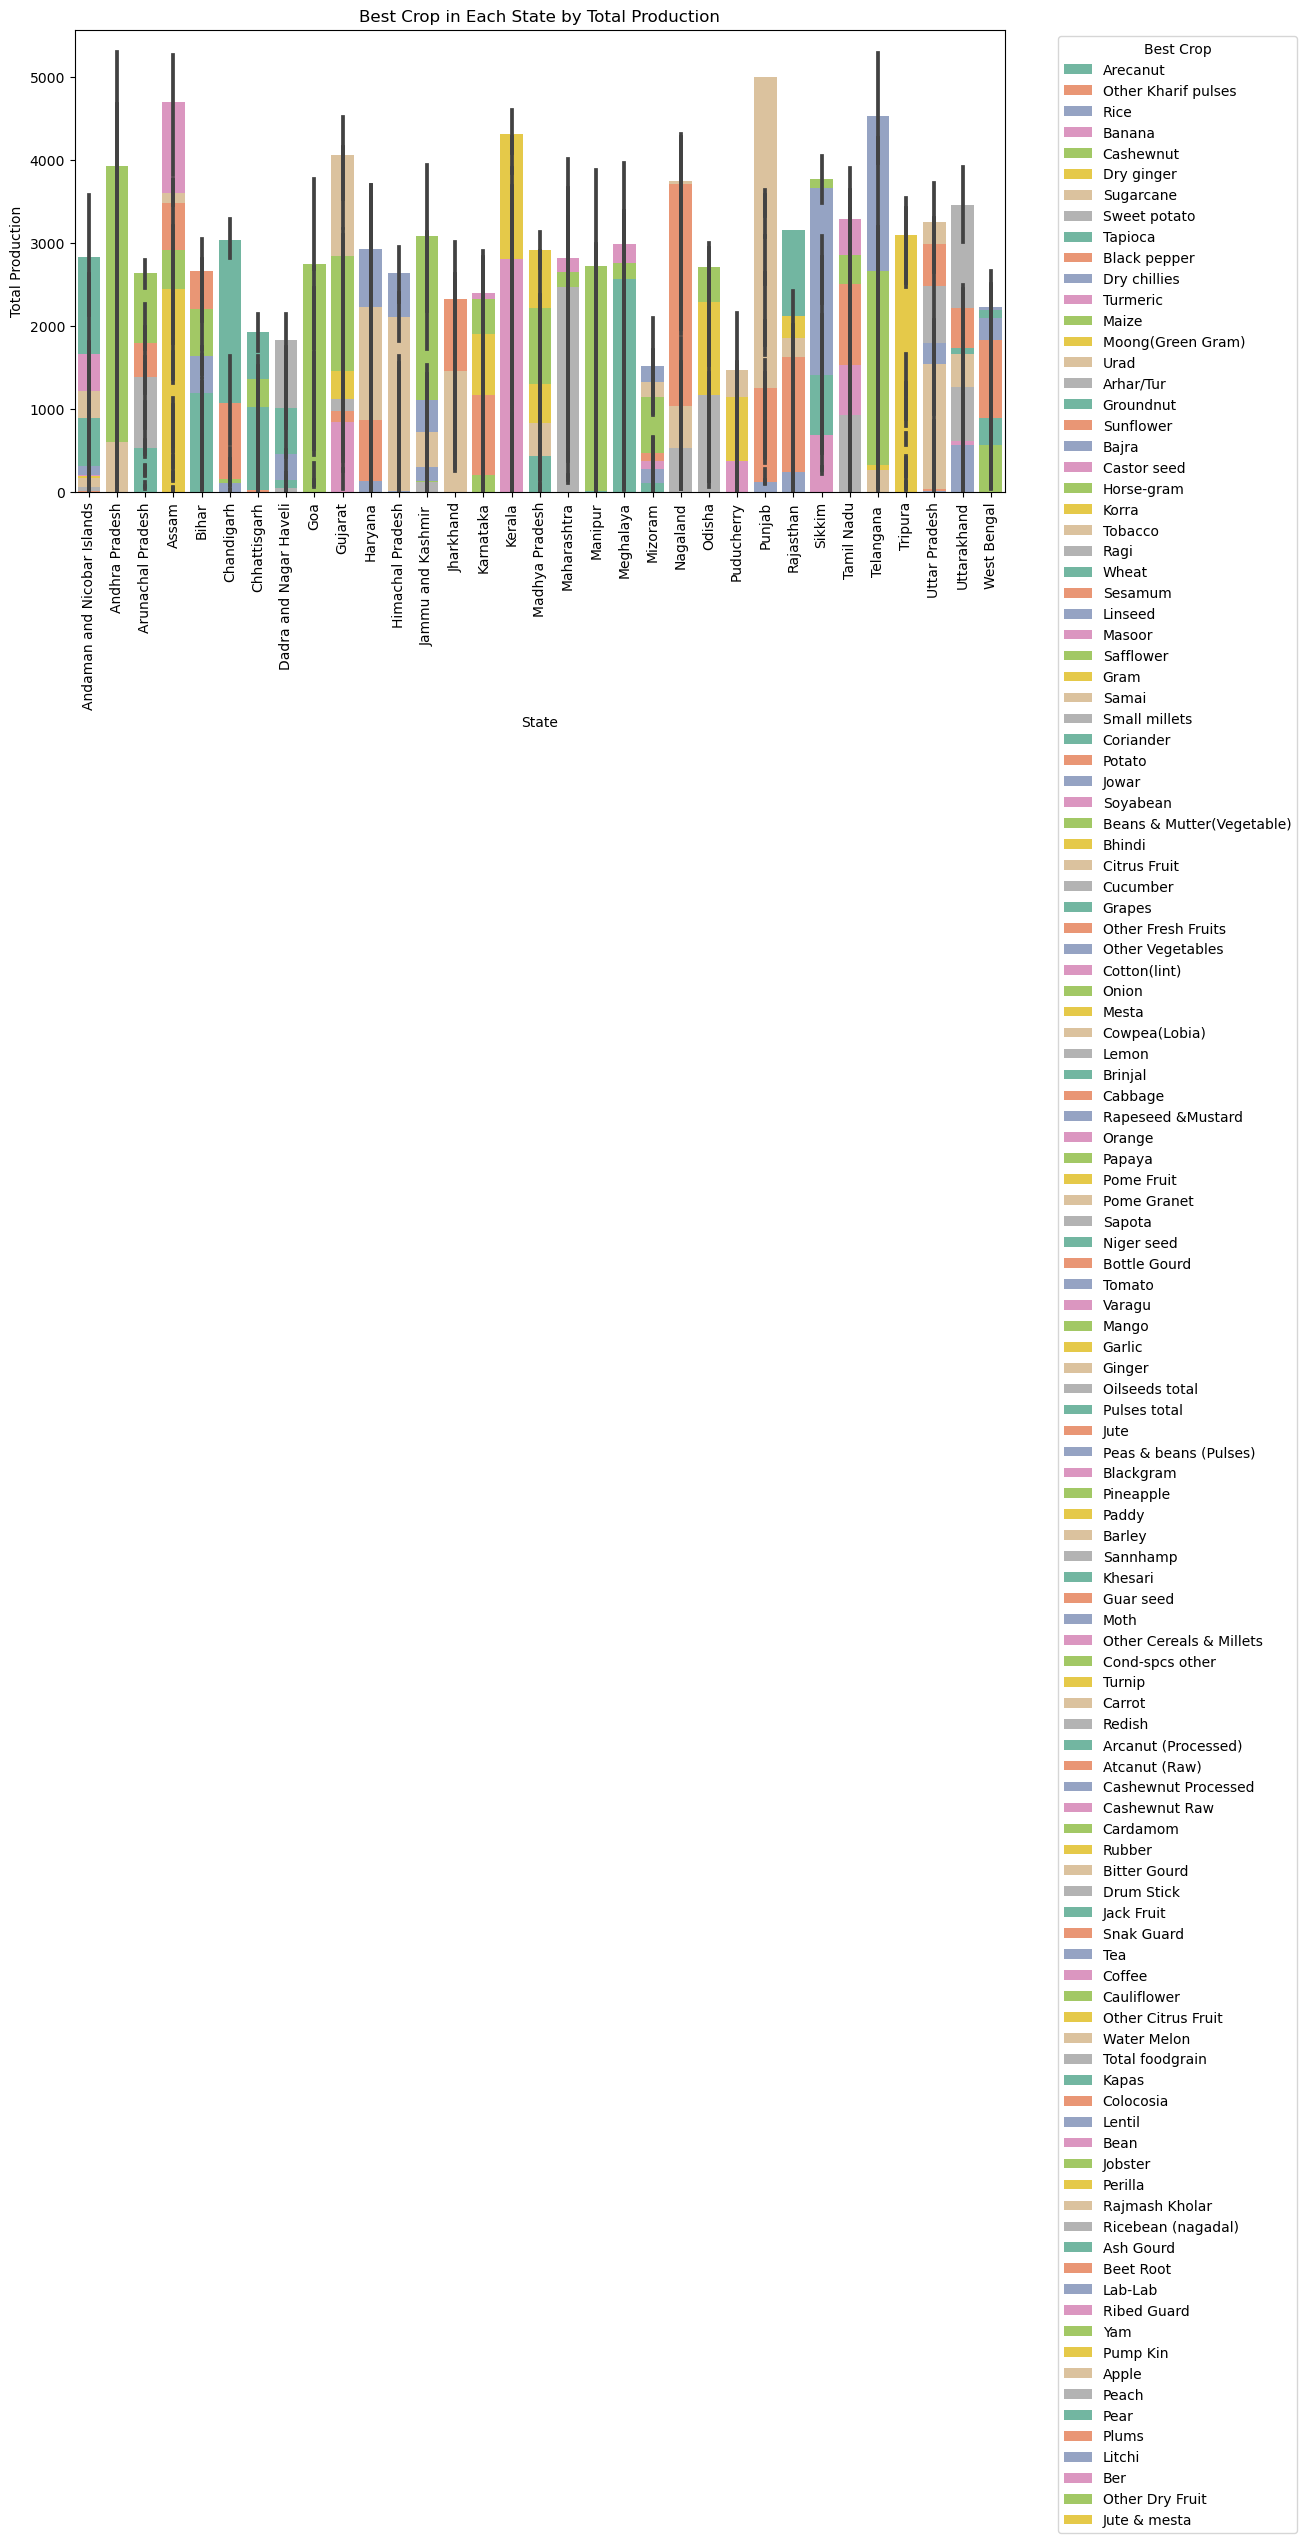

In [53]:
palette = sns.color_palette("Set2", len(df1['Crop'].unique()))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='State_Name', y='Production', hue='Crop', data=df1, dodge=False, palette=palette)
plt.title('Best Crop in Each State by Total Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.legend(title='Best Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

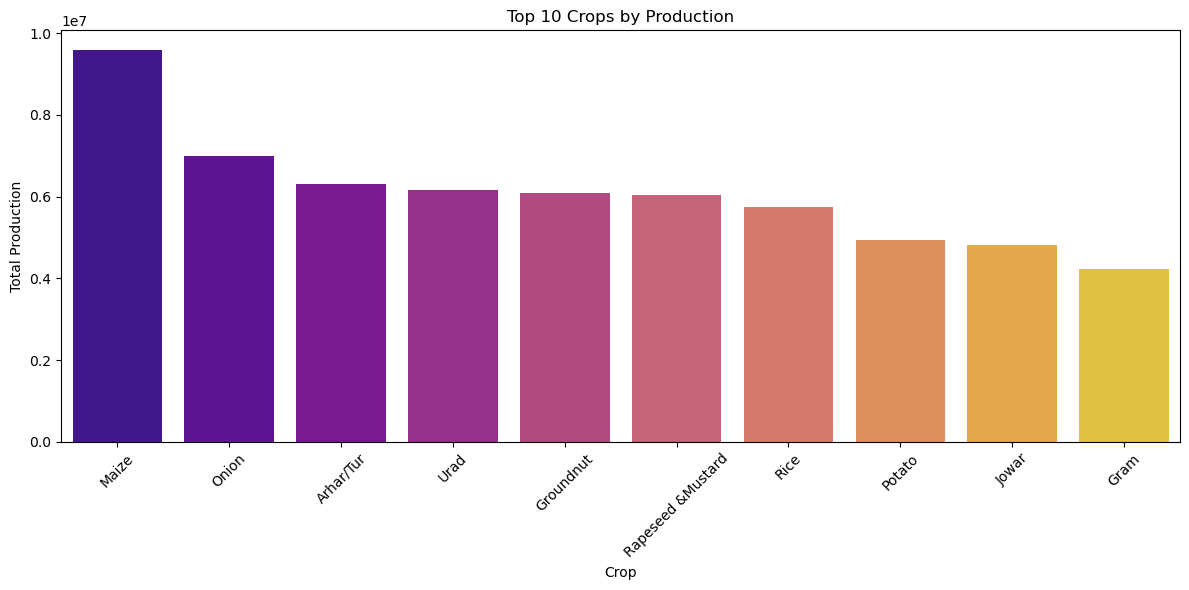

In [54]:
# Calculate the total production for each crop
total_production_crop = df1.groupby('Crop')['Production'].sum().reset_index()

# Define how many top crops to show
top_n = 10  
top_crops = total_production_crop.nlargest(top_n, 'Production')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production', data=top_crops, palette='plasma')
plt.title(f'Top {top_n} Crops by Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Dependency Test

### Dependency test for independent variables(categorical) with independent variables(categorical) - (Chi2)

In [55]:
df1.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Crop_Category', 'Area', 'Production'],
      dtype='object')

In [56]:
discrete_columns=["State_Name", 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Crop_Category']

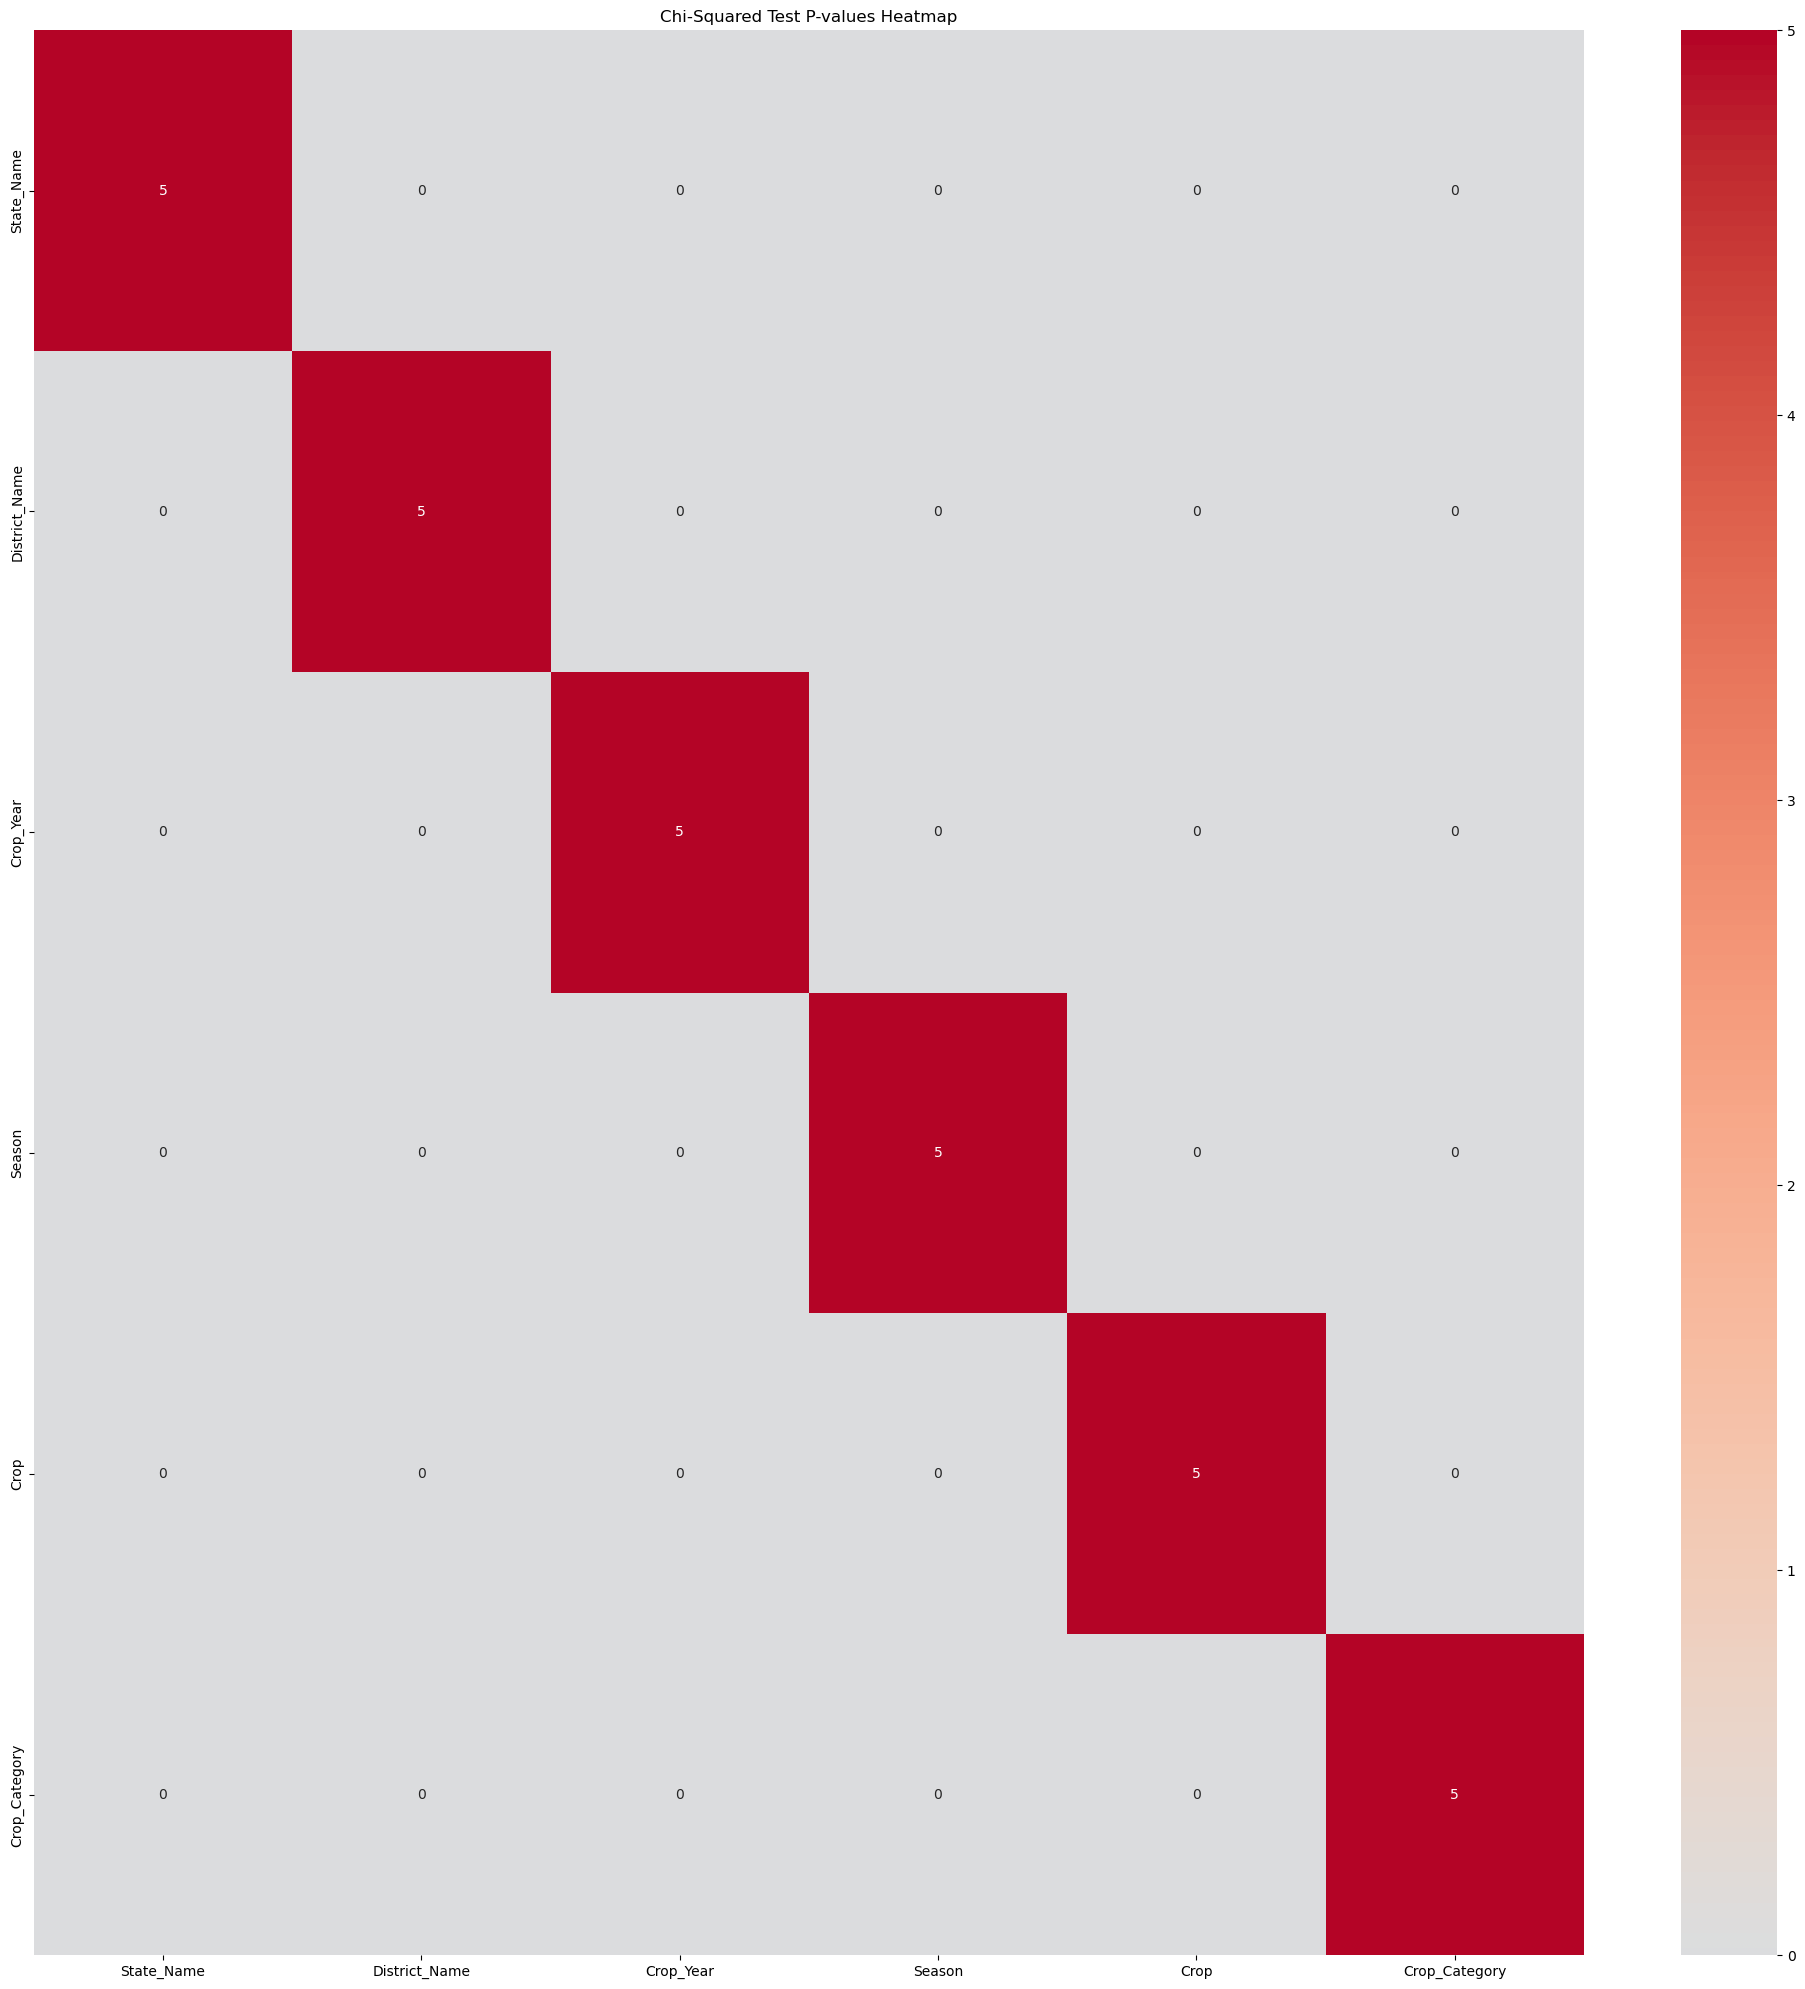

In [57]:
from scipy.stats import chi2_contingency
df2=df1[discrete_columns]
a=df2.shape[1]
p_values_matrix = np.zeros((a, a))
chi2_dependent_features=[]
for i in range(a):
    for j in range(a):
        contingency_table = pd.crosstab(df2.iloc[:,i], df2.iloc[:,j])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if i==j:
            p_values_matrix[i, j] = 5
            p_values_matrix[j, i] = 5
        else:
            if p<0.05:
                chi2_dependent_features.append(df2.columns[i])
                chi2_dependent_features.append(df2.columns[j])
                p_values_matrix[i, j] = 0
                p_values_matrix[j, i] = 0
            else:
                p_values_matrix[i, j] = 1
                p_values_matrix[j, i] = 1

p_values_df = pd.DataFrame(p_values_matrix, columns=df2.columns, index=df2.columns)

plt.figure(figsize=(25, 25))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', cbar=True, center=0.05)
plt.title('Chi-Squared Test P-values Heatmap')
plt.show()

### Dependency test for independent variables(numerical) with independent variables(numerical) - (correlation)

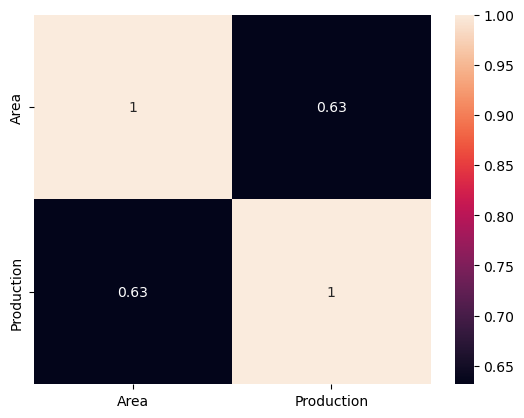

In [58]:
sns.heatmap(df1[continious_columns].corr(), annot=True)
plt.show()

# Train Test Split

In [59]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in df1.columns:
    if df1[x].dtype == "object":
        df1[x]=le.fit_transform(df1[x])

In [60]:
X = df1.iloc[:,0:-1]
Y = df1.iloc[:,-1]

In [61]:
print(X.shape)
print(Y.shape)

(169637, 7)
(169637,)


In [62]:
from sklearn.model_selection import train_test_split  

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [63]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(135709, 7)
(135709,)
(33928, 7)
(33928,)


# Scaling  (X variables)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [65]:
score_card = pd.DataFrame(columns=['Model','RMSE', 'R2 score'])
from sklearn import metrics
def updateScoreCardTrain(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'RMSE': [np.sqrt(mean_squared_error(Y_train, train_pred))],
        'R2 score': [r2_score(Y_train, train_pred)]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

def updateScoreCardTest(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'RMSE': [np.sqrt(mean_squared_error(Y_test, test_pred))],
        'R2 score': [r2_score(Y_test, test_pred)]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'Linear Regression Train')
score_card = updateScoreCardTest(score_card, 'Linear Regression Test')
score_card

,Model,RMSE,R2 score
0,Linear Regression Train,894.472907,0.413785
1,Linear Regression Test,906.268121,0.408515


### DecisionTreeRegressor

In [67]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'Decision Tree Train')
score_card = updateScoreCardTest(score_card, 'Decision Tree Test')
score_card

,Model,RMSE,R2 score
0,Linear Regression Train,8.944729e+02,0.413785
1,Linear Regression Test,9.062681e+02,0.408515
2,Decision Tree Train,2.267162e-19,1.000000
3,Decision Tree Test,5.779655e+02,0.759434


### Random Forest Regression

In [68]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train, Y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'Random Forest Train')
score_card = updateScoreCardTest(score_card, 'Random Forest Test')
score_card

,Model,RMSE,R2 score
0,Linear Regression Train,8.944729e+02,0.413785
1,Linear Regression Test,9.062681e+02,0.408515
2,Decision Tree Train,2.267162e-19,1.000000
3,Decision Tree Test,5.779655e+02,0.759434
4,Random Forest Train,1.591135e+02,0.981450
5,Random Forest Test,4.253166e+02,0.869727


### AdaBoostRegressor

In [69]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, Y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'AdaBoost Train')
score_card = updateScoreCardTest(score_card, 'AdaBoost Test')
score_card

,Model,RMSE,R2 score
0,Linear Regression Train,8.944729e+02,0.413785
1,Linear Regression Test,9.062681e+02,0.408515
2,Decision Tree Train,2.267162e-19,1.000000
3,Decision Tree Test,5.779655e+02,0.759434
4,Random Forest Train,1.591135e+02,0.981450
5,Random Forest Test,4.253166e+02,0.869727
6,AdaBoost Train,8.343573e+02,0.489933
7,AdaBoost Test,8.384480e+02,0.493729


### GradientBoostingRegressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'Gradient Boosting Train')
score_card = updateScoreCardTest(score_card, 'Gradient Boosting Test')
score_card

,Model,RMSE,R2 score
0,Linear Regression Train,8.944729e+02,0.413785
1,Linear Regression Test,9.062681e+02,0.408515
2,Decision Tree Train,2.267162e-19,1.000000
3,Decision Tree Test,5.779655e+02,0.759434
4,Random Forest Train,1.591135e+02,0.981450
5,Random Forest Test,4.253166e+02,0.869727
6,AdaBoost Train,8.343573e+02,0.489933
7,AdaBoost Test,8.384480e+02,0.493729
8,Gradient Boosting Train,6.322498e+02,0.707113
9,Gradient Boosting Test,6.431939e+02,0.702070


### XGB Regressor

In [71]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,Y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'XGB Train')
score_card = updateScoreCardTest(score_card, 'XGB Test')
score_card

,Model,RMSE,R2 score
0,Linear Regression Train,8.944729e+02,0.413785
1,Linear Regression Test,9.062681e+02,0.408515
2,Decision Tree Train,2.267162e-19,1.000000
3,Decision Tree Test,5.779655e+02,0.759434
4,Random Forest Train,1.591135e+02,0.981450
5,Random Forest Test,4.253166e+02,0.869727
6,AdaBoost Train,8.343573e+02,0.489933
7,AdaBoost Test,8.384480e+02,0.493729
8,Gradient Boosting Train,6.322498e+02,0.707113
9,Gradient Boosting Test,6.431939e+02,0.702070


### ANN Model

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [73]:
model = Sequential()

model.add(Dense(128,activation = "relu", input_dim=7))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = "linear"))

In [74]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(optimizer= 'adam',loss= "mean_squared_error", metrics= ['accuracy'])
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
ann_model = model.fit(X_train, Y_train, batch_size = 16, epochs = 2, validation_data=(X_test, Y_test), callbacks=[earlystopping])

Epoch 1/2
8482/8482 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.0183 - loss: 777455.6250 - val_accuracy: 0.0128 - val_loss: 555952.8125
Epoch 2/2
8482/8482 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0142 - loss: 523426.6250 - val_accuracy: 0.0185 - val_loss: 508430.0000


In [76]:
model.evaluate(X_test, Y_test)

1061/1061 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0186 - loss: 505138.1250


[508430.0625, 0.01853925921022892]

In [77]:
test_pred = model.predict(X_test)
test_pred = np.round(test_pred)
train_pred = model.predict(X_train)
train_pred = np.round(train_pred)

score_card = updateScoreCardTrain(score_card, 'ANNTrain')
score_card = updateScoreCardTest(score_card, 'ANNTest')
score_card

1061/1061 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4241/4241 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


,Model,RMSE,R2 score
0,Linear Regression Train,8.944729e+02,0.413785
1,Linear Regression Test,9.062681e+02,0.408515
2,Decision Tree Train,2.267162e-19,1.000000
3,Decision Tree Test,5.779655e+02,0.759434
4,Random Forest Train,1.591135e+02,0.981450
5,Random Forest Test,4.253166e+02,0.869727
6,AdaBoost Train,8.343573e+02,0.489933
7,AdaBoost Test,8.384480e+02,0.493729
8,Gradient Boosting Train,6.322498e+02,0.707113
9,Gradient Boosting Test,6.431939e+02,0.702070


# Model Selection

In [78]:
score_card

,Model,RMSE,R2 score
0,Linear Regression Train,8.944729e+02,0.413785
1,Linear Regression Test,9.062681e+02,0.408515
2,Decision Tree Train,2.267162e-19,1.000000
3,Decision Tree Test,5.779655e+02,0.759434
4,Random Forest Train,1.591135e+02,0.981450
5,Random Forest Test,4.253166e+02,0.869727
6,AdaBoost Train,8.343573e+02,0.489933
7,AdaBoost Test,8.384480e+02,0.493729
8,Gradient Boosting Train,6.322498e+02,0.707113
9,Gradient Boosting Test,6.431939e+02,0.702070
